In [1]:
# imports for the testing of the Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample

# Load dataset
data_set = "gs://dataproc-staging-us-central1-678565301111-3rjy5jav/google-cloud-dataproc-metainfo/dataset.csv"

# Loads csv file into dataframe
df = pd.read_csv(data_set, storage_options={"token": None})

In [2]:
print(df.info()) # Shows metadata

print(df.head()) # Shows first 5 rows of dataset

print(df.shape[0]) # Rows in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [3]:
# Takes popularity from dataset and sets condition 
# Less than 75, song is not a hit = 0
# More than 75, song is a hit = 1
df['hit'] = np.where(df['popularity'] >= 75,1,0)

In [4]:
# Filters hits = 1
hits = df[df['hit'] == 1]

# Filters non hits = 0
non_hits = df[df['hit'] == 0]

In [5]:
# Balances the dataset with enqual number os hit and non hit songs for training
non_hits_sampled = resample(non_hits, replace=False, n_samples=len(hits), random_state=1)
df_balanced = pd.concat([hits, non_hits_sampled])

In [6]:
# The features that might influence popularity for songs
features = ['energy','explicit','danceability','loudness','liveness','tempo','track_genre','instrumentalness','valence','speechiness']

# Defining features = x
x = df_balanced[features]

# Defining target which is hit
y = df_balanced['hit']

In [7]:
# Changes track_genre into columns
x = pd.get_dummies(x, columns=['track_genre'])

# Shows columns after track_genre
print(x.head())

      energy  explicit  danceability  loudness  liveness    tempo  \
4      0.443     False         0.618    -9.681    0.0829  119.949   
7      0.444     False         0.703    -9.331    0.0973  150.960   
20     0.444     False         0.703    -9.331    0.0973  150.960   
60     0.457     False         0.375    -7.018    0.1910  174.839   
1100   0.878      True         0.829    -5.951    0.7760   87.991   

      instrumentalness  valence  speechiness  track_genre_acoustic  ...  \
4               0.0000    0.167       0.0526                  True  ...   
7               0.0000    0.712       0.0417                  True  ...   
20              0.0000    0.712       0.0417                  True  ...   
60              0.0145    0.415       0.0315                  True  ...   
1100            0.0000    0.883       0.1010                 False  ...   

      track_genre_spanish  track_genre_study  track_genre_swedish  \
4                   False              False                False

In [8]:
# Splits the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [9]:
# Initialize Logistic Regression Model
model = LogisticRegression(class_weight='balanced',max_iter=1000)

# Train the model
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [10]:
# Uses Logistic regression model to predict hits versus non hits
y_pred = model.predict(x_test)

In [11]:
# Prints percentage of how many predictions were correct
print("Accuracy Score: %.3f" % accuracy_score(y_test, y_pred))

# Prints the report of summarized prediction performance
print("Classification Report:\n",classification_report(y_test, y_pred))

# Prints correctly predicted hits, non hits, false positives, and false negatives
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.806
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       698
           1       0.78      0.87      0.82       718

    accuracy                           0.81      1416
   macro avg       0.81      0.81      0.81      1416
weighted avg       0.81      0.81      0.81      1416

Confusion Matrix:
 [[517 181]
 [ 93 625]]


In [12]:
# Dimensions for the figures that follow
plt.figure(figsize=(16,6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

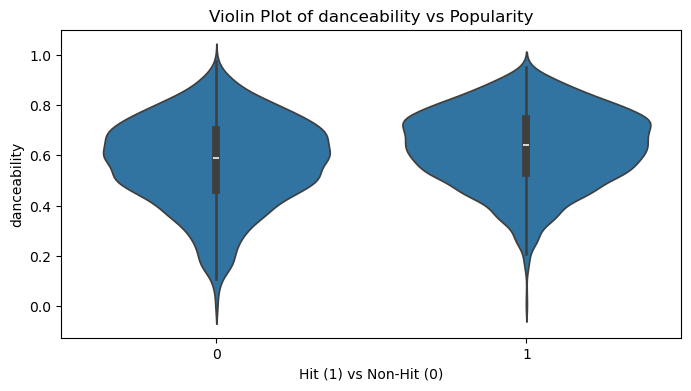

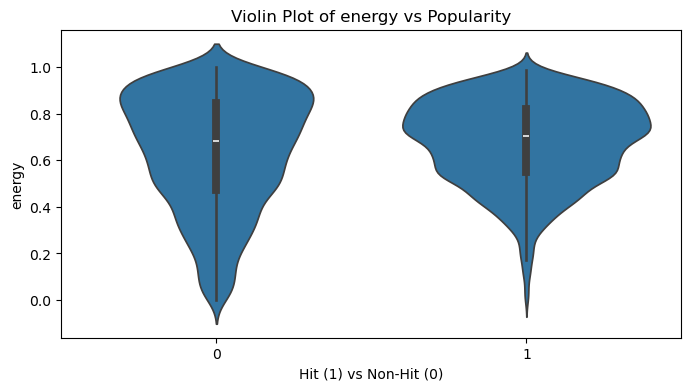

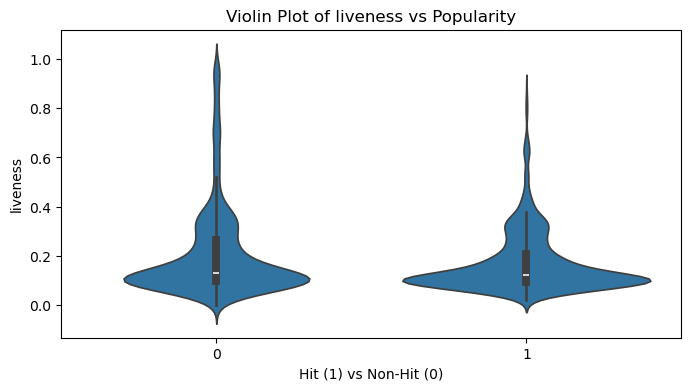

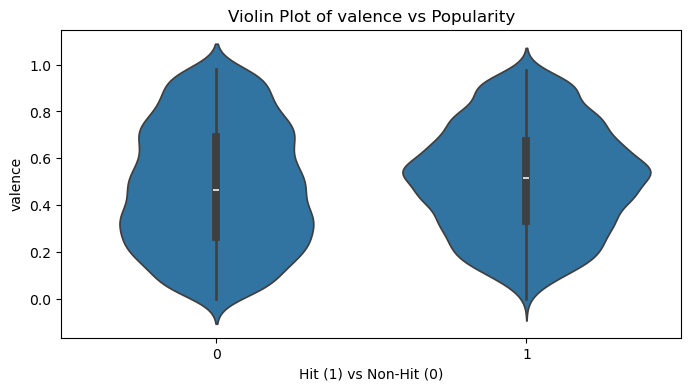

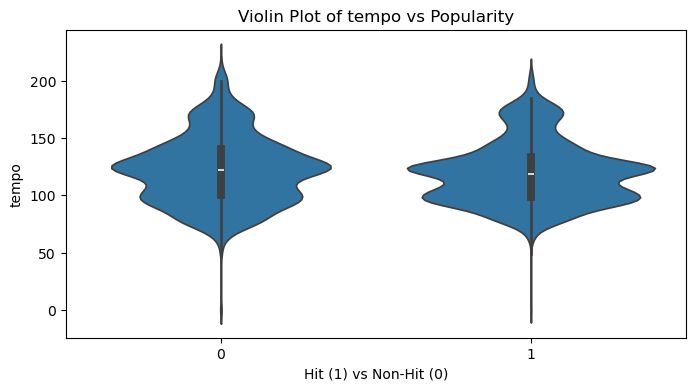

In [13]:
# Violin Plots
# A loop that creates the figures of the features listed and compares them to popularity, hit and non hit
for feature in ['danceability','energy','liveness','valence','tempo']:
    plt.figure(figsize=(8,4))
    sns.violinplot(x=df_balanced['hit'], y=df_balanced[feature])
    plt.title(f'Violin Plot of {feature} vs Popularity')
    plt.xlabel('Hit (1) vs Non-Hit (0)')
    plt.ylabel(feature)
    plt.show()

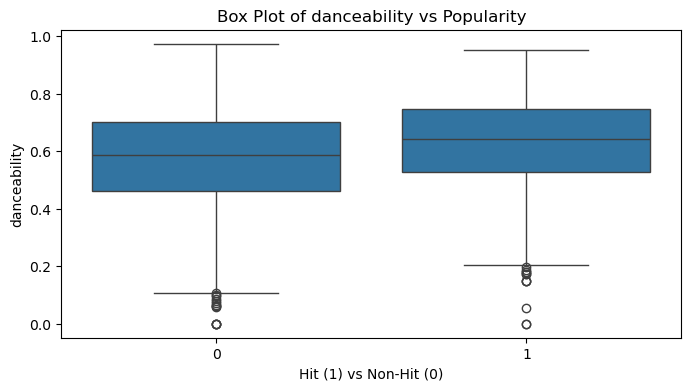

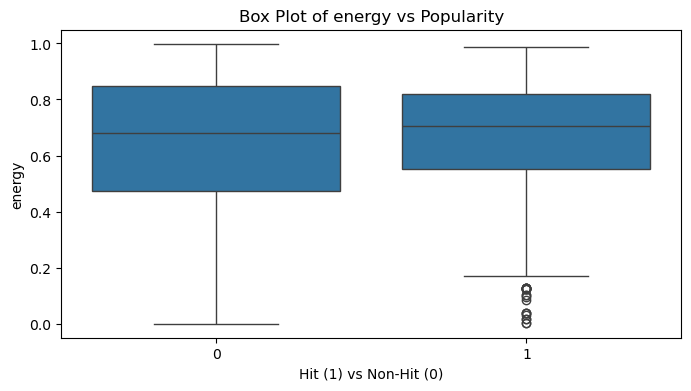

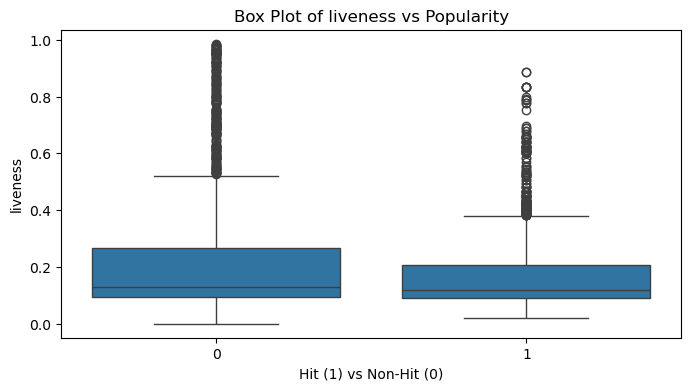

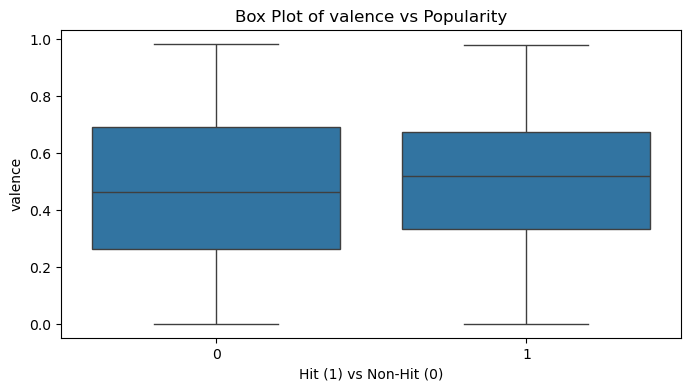

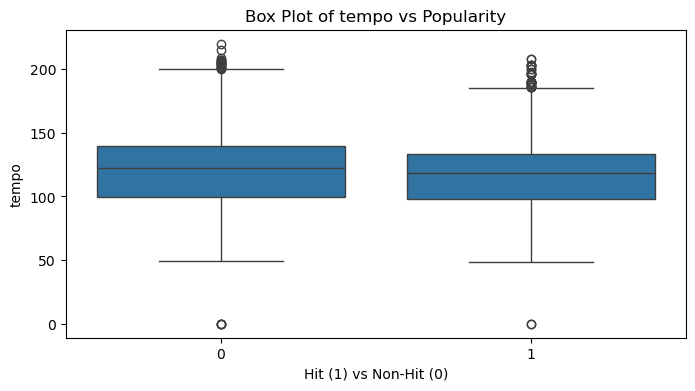

In [14]:
# Box Plots
# A loop that compares each of the features between popularity, hit and non hit
for feature in ['danceability','energy','liveness','valence','tempo']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df_balanced['hit'], y=df_balanced[feature])
    plt.title(f'Box Plot of {feature} vs Popularity')
    plt.xlabel('Hit (1) vs Non-Hit (0)')
    plt.ylabel(feature)
    plt.show()

<Figure size 1000x600 with 0 Axes>

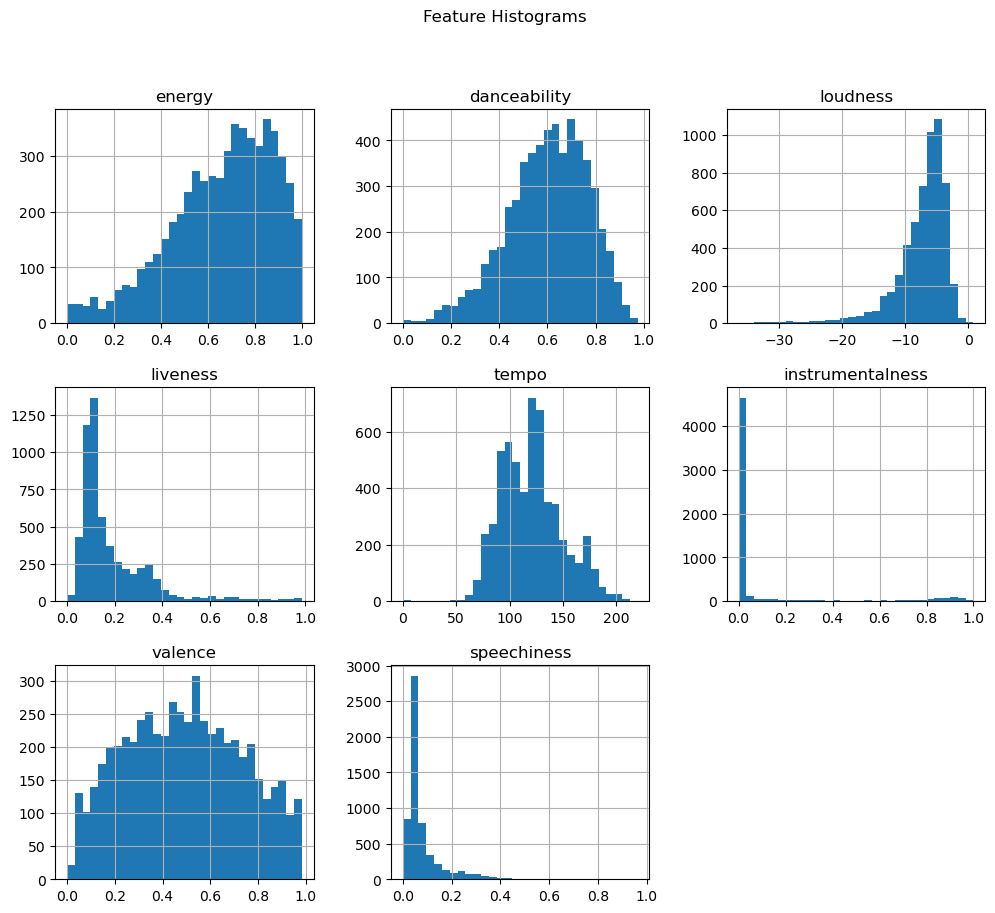

In [15]:
# Histograms
# Plots histograms for features and their values in songs
plt.figure(figsize=(10, 6))
df_balanced[features].hist(bins=30, figsize=(12, 10))
plt.suptitle("Feature Histograms")
plt.show()

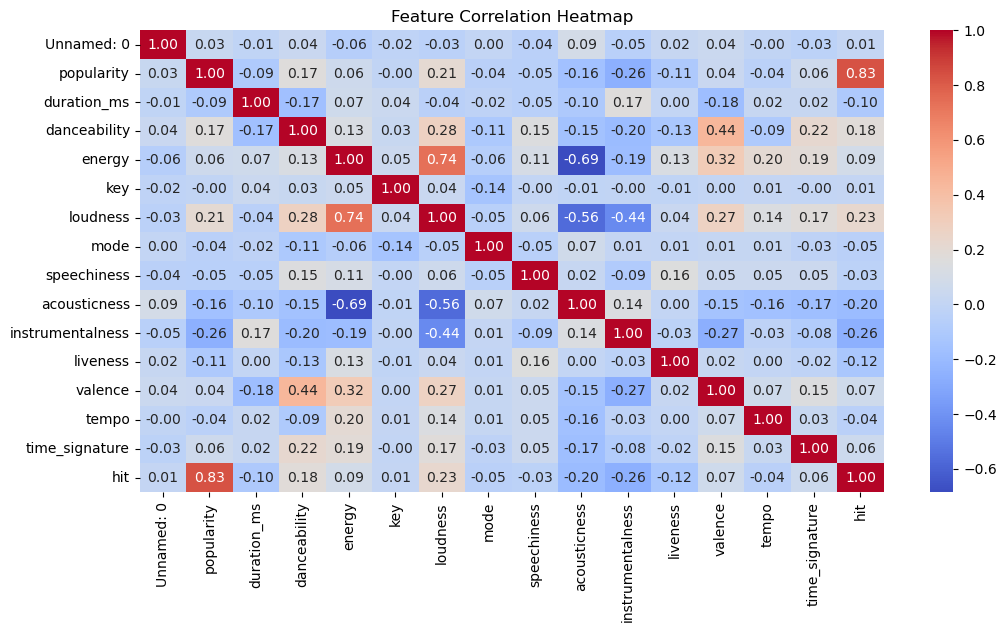

In [16]:
# Heat Map
# Helps visualize relationships between song sttributes that could influence popularity
plt.figure(figsize=(12, 6))
sns.heatmap(df_balanced.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

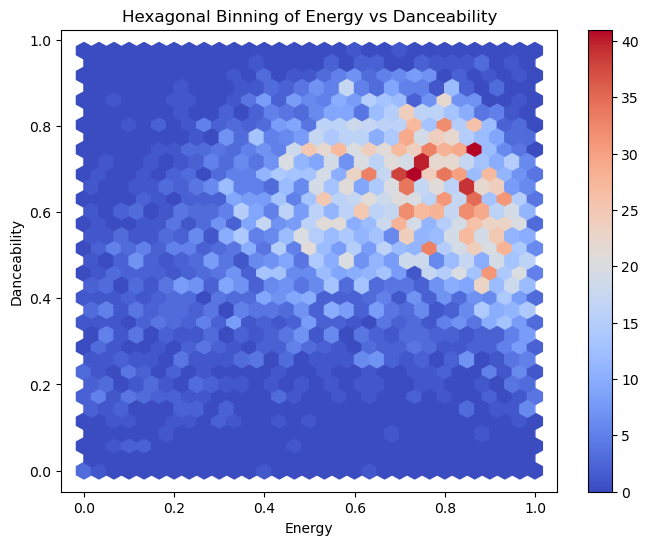

In [17]:
# Hexagonal Binning
# Visualizes the density of songs based on their energy and danceability
plt.figure(figsize=(8, 6))
plt.hexbin(df_balanced['energy'], df_balanced['danceability'], gridsize=30, cmap='coolwarm')
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.title("Hexagonal Binning of Energy vs Danceability")
plt.colorbar()
plt.show()